# Declaration of Originality

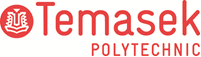

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Muhammad Haikal ( 2404597C )
* Tutorial Group                : C24B01
* Tutor						    : Ruchir Srivastava
* Submission Date               : 11/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

# Diabetes Prediction Project
Predicting diabetes risk in patients based on lifestyle factors and medical 
indicators to enable early screening and preventive healthcare interventions.

- Source: [Kaggle Link]
- Size: 100,000 samples
- Features: 8 predictor variables
- Target: diabetes (binary: 0 = No, 1 = Yes)

In [2]:
## Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Business Understanding
Goal : Predicting diabetes risk in patients based on lifestyle factors and medical 
indicators to enable early screening and preventive healthcare interventions.

# 2. Data Understanding

## 2.1 Load dataset

In [5]:
FILE_PATH = "diabetes_prediction_dataset.csv"  # NOTE: file is CSV instead of Excel
df = pd.read_csv(FILE_PATH)
df ## Display dataframe

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## 2.2 Summary Statistics

In [15]:
## Understand the type of variable for each column
print(df.info())
print("\n" + "-"*50 + "\n")
print("Data Types Summary : ")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

--------------------------------------------------

Data Types Summary : 
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
Hb

In [20]:
## Check for missing data
print("Missing Values : ")
print(df.isnull().sum())

Missing Values : 
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


### What am I doing here?
I'm analyzing how the data is distributed across all features to understand:
- The central tendency (mean, median) of numerical features
- The spread (standard deviation, min, max) of values
- Whether data is skewed or symmetrical
- The frequency of each category in categorical features

### Why does this matter?
Understanding data distribution helps me:
- Identify if features need scaling or transformation
- Detect outliers that might affect model performance
- Understand if certain values dominate the dataset
- Make informed decisions about data preprocessing

In [21]:
## Describe data distribution

# Get overall statistical summary
print("="*60)
print("STATISTICAL SUMMARY - NUMERICAL FEATURES")
print("="*60)
print(df.describe())

# Detailed statistics for each numerical feature
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

print("\n" + "="*60)
print("DETAILED STATISTICS")
print("="*60)

for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Mean:              {df[col].mean():.2f}")
    print(f"  Median:            {df[col].median():.2f}")
    print(f"  Standard Deviation: {df[col].std():.2f}")
    print(f"  Minimum:           {df[col].min():.2f}")
    print(f"  Maximum:           {df[col].max():.2f}")
    print(f"  25th Percentile:   {df[col].quantile(0.25):.2f}")
    print(f"  75th Percentile:   {df[col].quantile(0.75):.2f}")

STATISTICAL SUMMARY - NUMERICAL FEATURES
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.0

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

TARGET VARIABLE ( diabetes ) DISTRIBUTION

Value Counts : 
diabetes
0    91500
1     8500
Name: count, dtype: int64

Percentage : 
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64

WARNING - IMBALANCE RATIO: 10.76:1 (Non-Diabetes : Diabetes)
This means : For every 1 diabetes case, there are 10.8 non-diabetes cases!


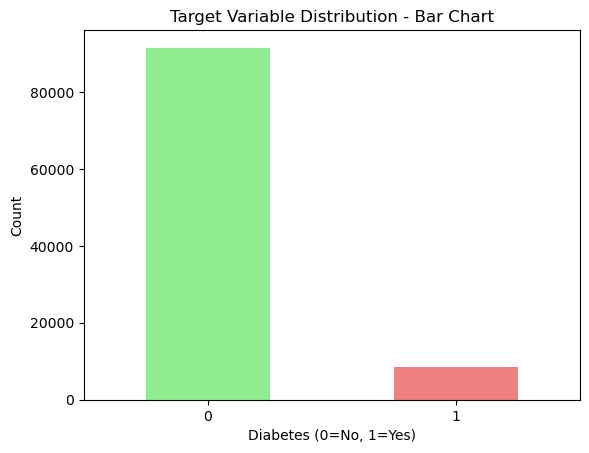

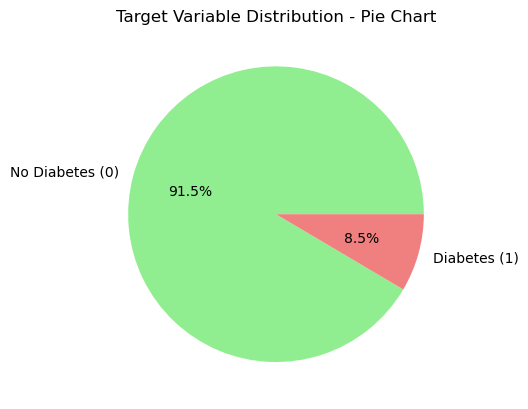


WARNING - CLASS IMBALANCE DETECTED !!!

This dataset has 91,500 No Diabetes cases (91.5%)
and only 8,500 Diabetes cases (8.5%) 


In [34]:
import matplotlib.pyplot as plt

# Count the values
print("="*60)
print("TARGET VARIABLE ( diabetes ) DISTRIBUTION")
print("="*60)

# Show the counts
print("\nValue Counts : ")
diabetes_counts = df['diabetes'].value_counts()
print(diabetes_counts)

# Show percentages
print("\nPercentage : ")
diabetes_percent = df['diabetes'].value_counts(normalize=True) * 100
print(diabetes_percent)

# Calculate imbalance
class_0 = diabetes_counts[0]
class_1 = diabetes_counts[1]
ratio = class_0 / class_1

print(f"\nWARNING - IMBALANCE RATIO: {ratio:.2f}:1 (Non-Diabetes : Diabetes)")
print(f"This means : For every 1 diabetes case, there are {ratio:.1f} non-diabetes cases!")

# VISUALIZATION 1: Bar Chart
diabetes_counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Target Variable Distribution - Bar Chart')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()

# VISUALIZATION 2: Pie Chart
df['diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                    colors=['lightgreen', 'lightcoral'],
                                    labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.title('Target Variable Distribution - Pie Chart')
plt.ylabel('')  # Remove 'diabetes' label on y-axis
plt.show()

# Warning message
print("\n" + "="*60)
print("WARNING - CLASS IMBALANCE DETECTED !!!")
print("="*60)
print(f"""
This dataset has {class_0:,} No Diabetes cases ({class_0/len(df)*100:.1f}%)
and only {class_1:,} Diabetes cases ({class_1/len(df)*100:.1f}%) """)

### Results: Target Distribution

**Critical Problem Identified: CLASS IMBALANCE!**

**Why this is dangerous:**
With [90]% negative cases, a model could achieve [90]% accuracy just by predicting "No diabetes" for everyone - without actually learning anything!

In medical diagnosis, missing a diabetes case (False Negative) means:
- Patient doesn't get treatment
- Disease progresses
- Complications develop
- More expensive healthcare later

**My Action Plan:**

1. **Evaluation Metrics I will use:**
   - **Recall (primary)** - catch as many diabetes cases as possible
   - F1-Score - balance precision and recall
   - ROC-AUC - overall performance

2. **Training Techniques I will use:**
   - `class_weight='balanced'` for Logistic Regression and Random Forest
   - `sample_weight` for Gradient Boosting
   - May try SMOTE as alternative

3. **Success Criteria:**
   - High Recall (catching diabetes cases is priority)
   - Acceptable False Positives (better safe than sorry)
   - Compare baseline vs balanced to show improvement

### 2.3.1.2 Understanding distribution of features

FEATURE DISTRIBUTION ANALYSIS

1. NUMERICAL FEATURES (Histograms):
------------------------------------------------------------

Analyzing age...
  Mean: 41.89
  Median: 43.00
  Min: 0.08, Max: 80.00


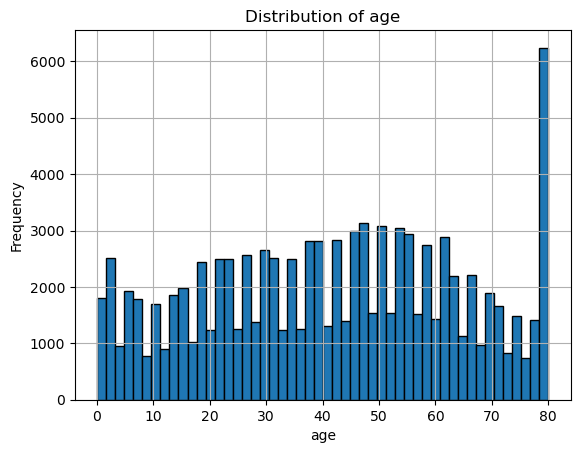


Analyzing bmi...
  Mean: 27.32
  Median: 27.32
  Min: 10.01, Max: 95.69


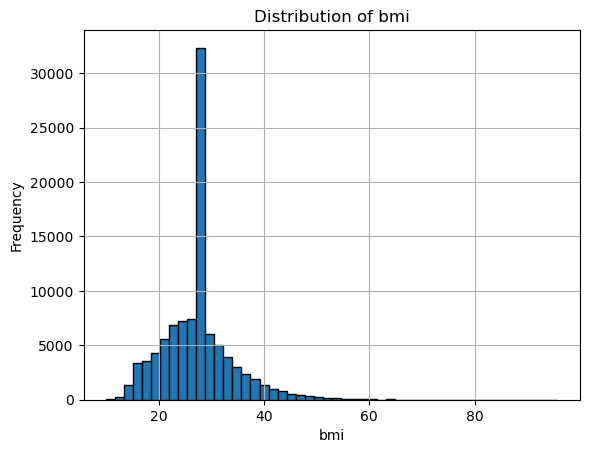


Analyzing HbA1c_level...
  Mean: 5.53
  Median: 5.80
  Min: 3.50, Max: 9.00


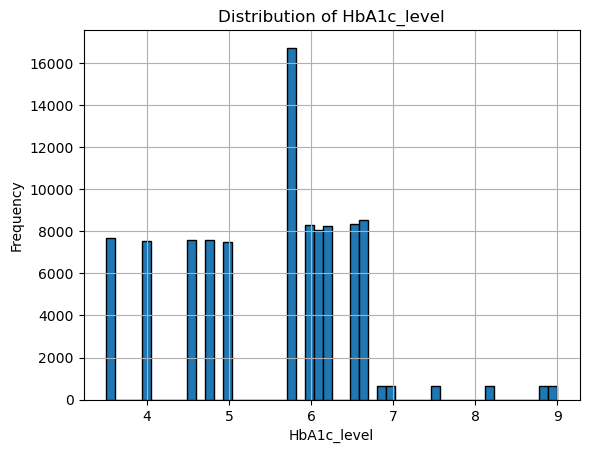


Analyzing blood_glucose_level...
  Mean: 138.06
  Median: 140.00
  Min: 80.00, Max: 300.00


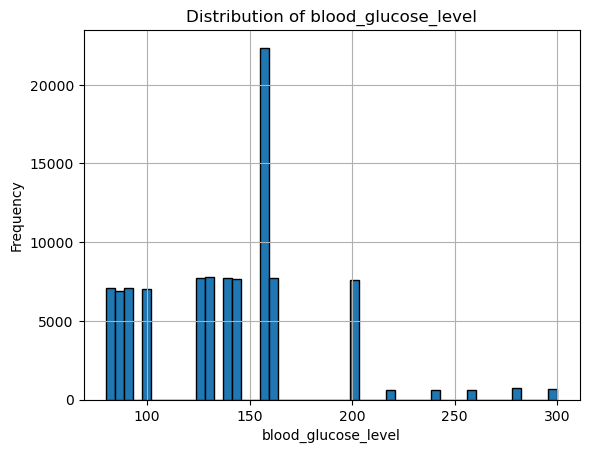


2. NUMERICAL FEATURES (Box Plots - Outlier Check):
------------------------------------------------------------


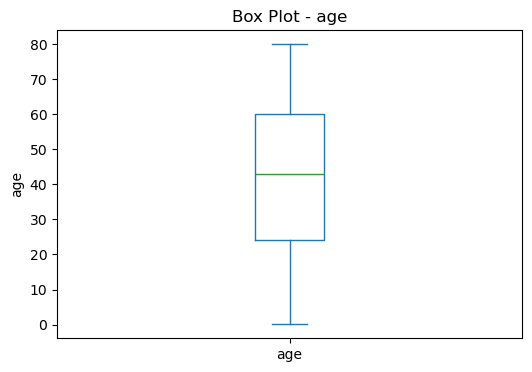

age: 0 outliers (0.00%)


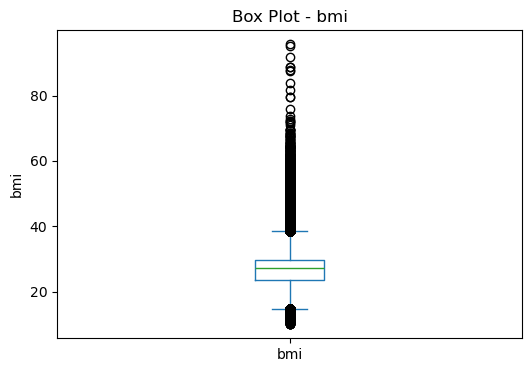

bmi: 7086 outliers (7.09%)


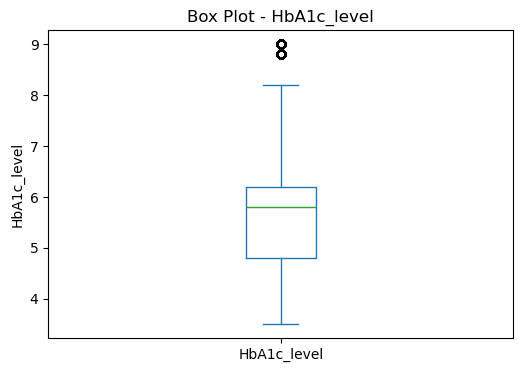

HbA1c_level: 1315 outliers (1.31%)


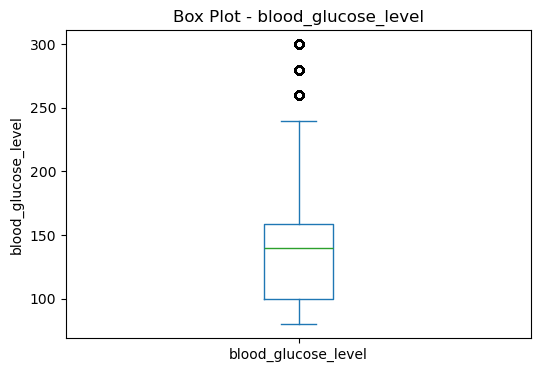

blood_glucose_level: 2038 outliers (2.04%)

3. CATEGORICAL FEATURES (Bar Charts):
------------------------------------------------------------

gender distribution:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Percentages:
gender
Female    58.552
Male      41.430
Other      0.018
Name: proportion, dtype: float64


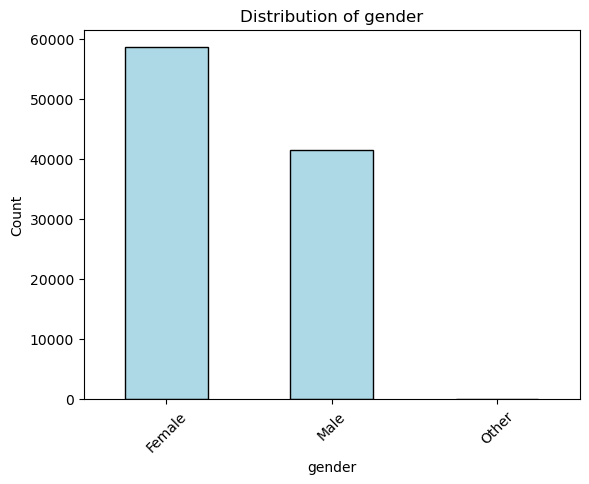


hypertension distribution:
hypertension
0    92515
1     7485
Name: count, dtype: int64

Percentages:
hypertension
0    92.515
1     7.485
Name: proportion, dtype: float64


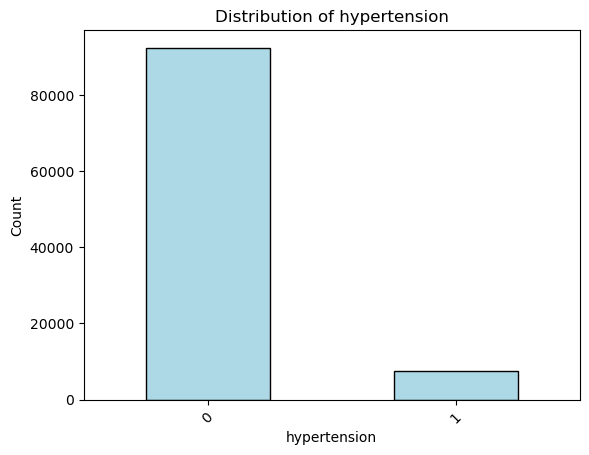


heart_disease distribution:
heart_disease
0    96058
1     3942
Name: count, dtype: int64

Percentages:
heart_disease
0    96.058
1     3.942
Name: proportion, dtype: float64


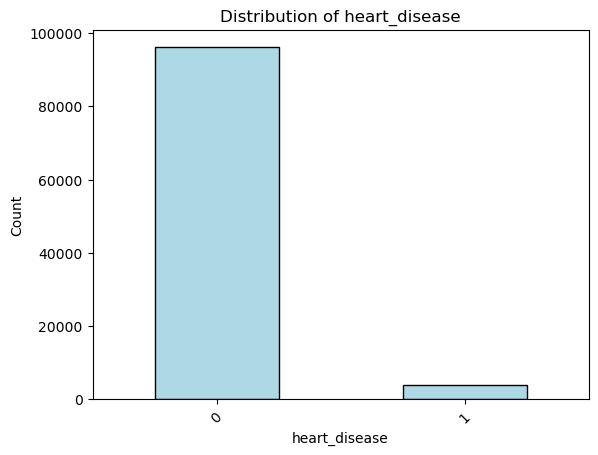


smoking_history distribution:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

Percentages:
smoking_history
No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004
Name: proportion, dtype: float64


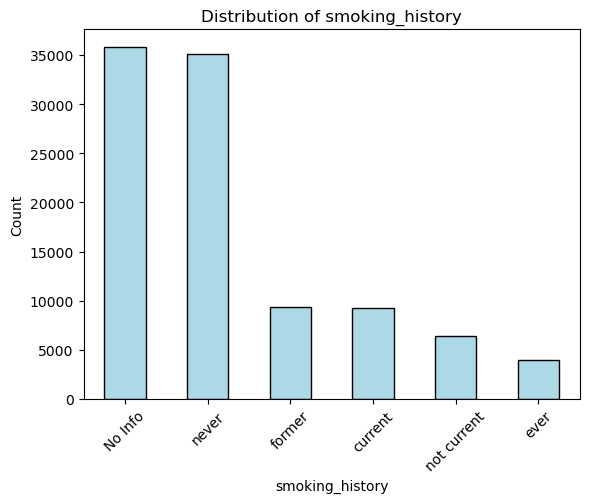


Feature distribution analysis complete!


In [35]:
## Understanding distribution of features

# Define feature types
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

print("="*60)
print("FEATURE DISTRIBUTION ANALYSIS")
print("="*60)

# ==========================================
# PART 1: NUMERICAL FEATURES - Histograms
# ==========================================
print("\n1. NUMERICAL FEATURES (Histograms):")
print("-"*60)

for col in numerical_cols:
    print(f"\nAnalyzing {col}...")
    
    # Show statistics
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Min: {df[col].min():.2f}, Max: {df[col].max():.2f}")
    
    # Create histogram (from lab method!)
    df[col].hist(bins=50, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# ==========================================
# PART 2: NUMERICAL FEATURES - Box Plots (Outliers)
# ==========================================
print("\n2. NUMERICAL FEATURES (Box Plots - Outlier Check):")
print("-"*60)

for col in numerical_cols:
    # Create box plot (from lab method!)
    df.plot(kind='box', y=col, figsize=(6,4))
    plt.title(f'Box Plot - {col}')
    plt.ylabel(col)
    plt.show()
    
    # Calculate outliers manually
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

# ==========================================
# PART 3: CATEGORICAL FEATURES - Bar Charts
# ==========================================
print("\n3. CATEGORICAL FEATURES (Bar Charts):")
print("-"*60)

for col in categorical_cols:
    print(f"\n{col} distribution:")
    
    # Show counts
    counts = df[col].value_counts()
    print(counts)
    print("\nPercentages:")
    print(df[col].value_counts(normalize=True) * 100)
    
    # Create bar chart (from lab method!)
    df[col].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

print("\n" + "="*60)
print("Feature distribution analysis complete!")
print("="*60)

### 2.3.2 Understanding relationship between variables

RELATIONSHIP ANALYSIS: Features vs Target

age by Diabetes Status:
----------------------------------------
Mean (No Diabetes): 40.12
Mean (Diabetes):    60.95
Difference:         +20.83
→ Diabetic patients have HIGHER age


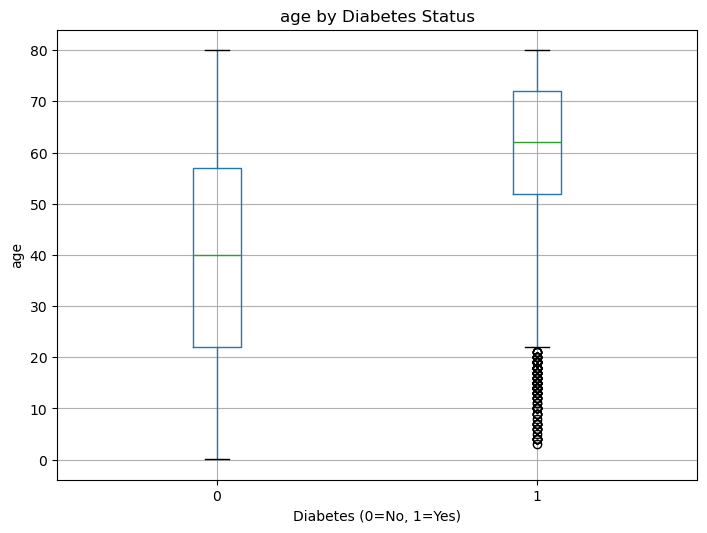


bmi by Diabetes Status:
----------------------------------------
Mean (No Diabetes): 26.89
Mean (Diabetes):    31.99
Difference:         +5.10
→ Diabetic patients have HIGHER bmi


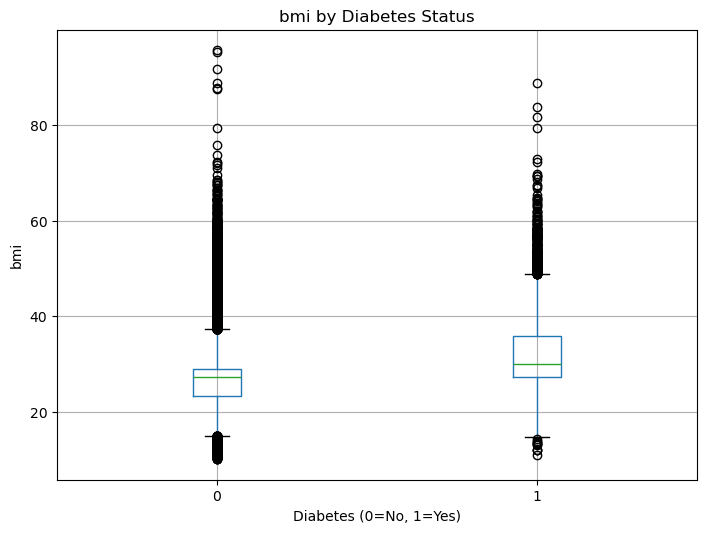


HbA1c_level by Diabetes Status:
----------------------------------------
Mean (No Diabetes): 5.40
Mean (Diabetes):    6.93
Difference:         +1.54
→ Diabetic patients have HIGHER HbA1c_level


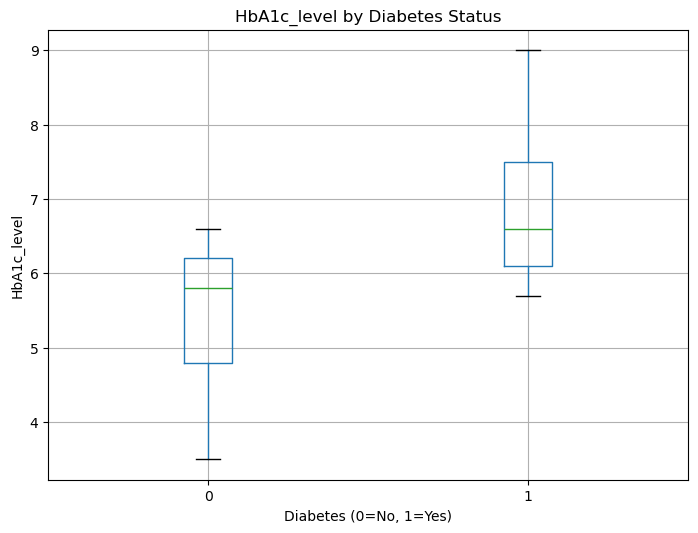


blood_glucose_level by Diabetes Status:
----------------------------------------
Mean (No Diabetes): 132.85
Mean (Diabetes):    194.09
Difference:         +61.24
→ Diabetic patients have HIGHER blood_glucose_level


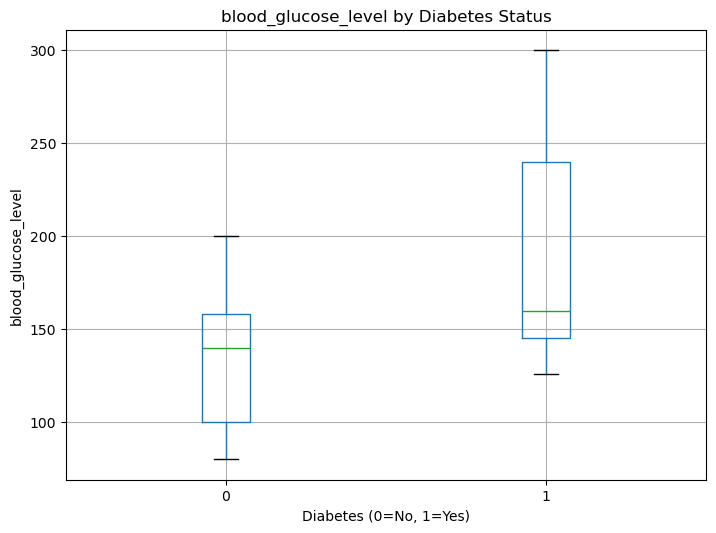


CATEGORICAL FEATURES vs DIABETES

gender vs Diabetes:
----------------------------------------
diabetes           0         1
gender                        
Female     92.381131  7.618869
Male       90.251026  9.748974
Other     100.000000  0.000000


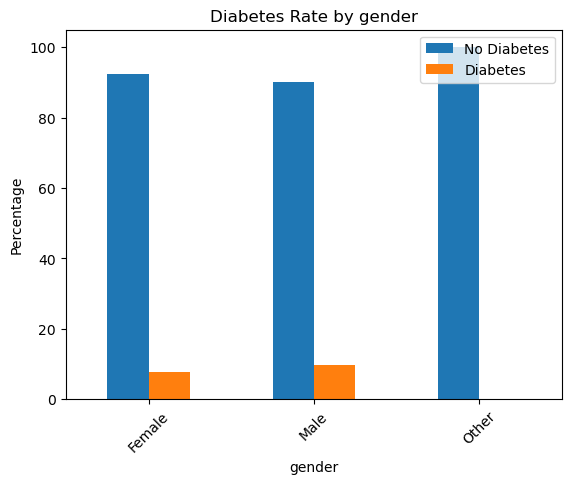


hypertension vs Diabetes:
----------------------------------------
diabetes              0          1
hypertension                      
0             93.069232   6.930768
1             72.104208  27.895792


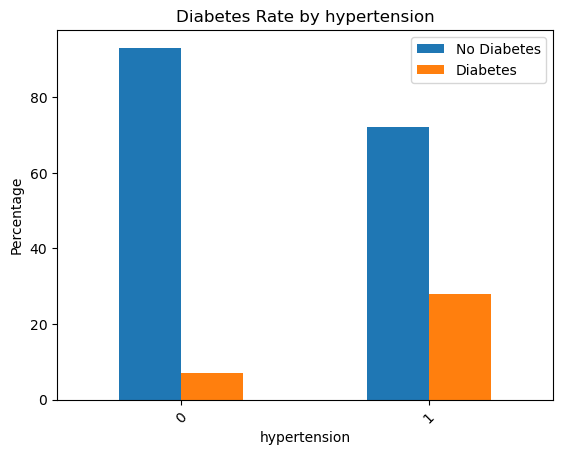


heart_disease vs Diabetes:
----------------------------------------
diabetes               0          1
heart_disease                      
0              92.470174   7.529826
1              67.858955  32.141045


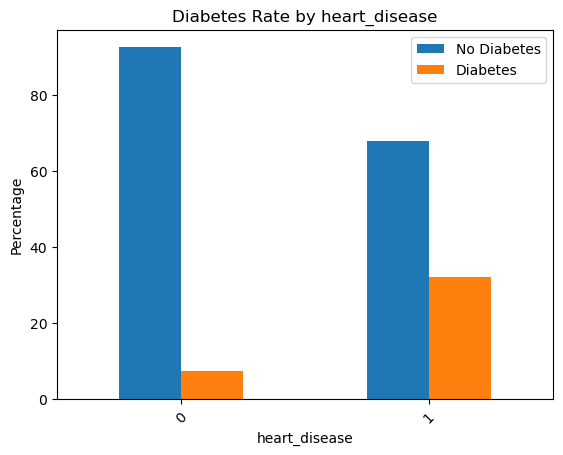


smoking_history vs Diabetes:
----------------------------------------
diabetes                 0          1
smoking_history                      
No Info          95.940362   4.059638
current          89.791083  10.208917
ever             88.211788  11.788212
former           82.998289  17.001711
never            90.465878   9.534122
not current      89.297348  10.702652


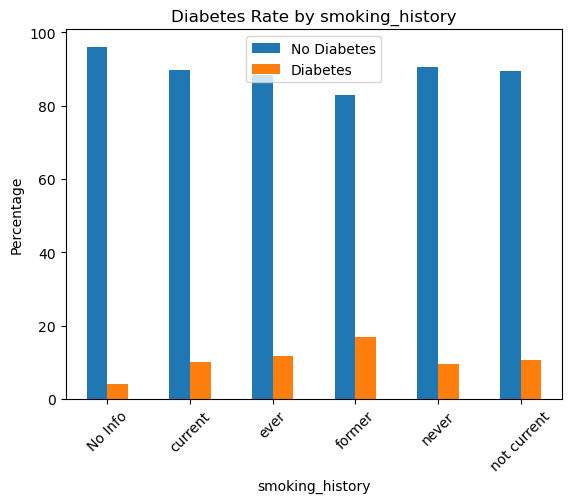


Relationship analysis complete!


In [37]:
## Understanding relationship between variables

import matplotlib.pyplot as plt

print("="*60)
print("RELATIONSHIP ANALYSIS: Features vs Target")
print("="*60)

numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Compare each numerical feature by diabetes status
for col in numerical_cols:
    print(f"\n{col} by Diabetes Status:")
    print("-"*40)
    
    # Calculate means for each group
    mean_no_diabetes = df[df['diabetes']==0][col].mean()
    mean_diabetes = df[df['diabetes']==1][col].mean()
    difference = mean_diabetes - mean_no_diabetes
    
    print(f"Mean (No Diabetes): {mean_no_diabetes:.2f}")
    print(f"Mean (Diabetes):    {mean_diabetes:.2f}")
    print(f"Difference:         {difference:+.2f}")
    
    if difference > 0:
        print(f"→ Diabetic patients have HIGHER {col}")
    else:
        print(f"→ Diabetic patients have LOWER {col}")
    
    # Create box plot by diabetes status (from lab method!)
    # Group by diabetes
    df.boxplot(column=col, by='diabetes', figsize=(8,6))
    plt.title(f'{col} by Diabetes Status')
    plt.suptitle('')  # Remove automatic title
    plt.xlabel('Diabetes (0=No, 1=Yes)')
    plt.ylabel(col)
    plt.show()

# Categorical features vs target
print("\n" + "="*60)
print("CATEGORICAL FEATURES vs DIABETES")
print("="*60)

categorical_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

for col in categorical_cols:
    print(f"\n{col} vs Diabetes:")
    print("-"*40)
    
    # Cross-tabulation
    crosstab = pd.crosstab(df[col], df['diabetes'], normalize='index') * 100
    print(crosstab)
    
    # Plot
    crosstab.plot(kind='bar', stacked=False)
    plt.title(f'Diabetes Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.legend(['No Diabetes', 'Diabetes'])
    plt.xticks(rotation=45)
    plt.show()

print("\n" + "="*60)
print("Relationship analysis complete!")
print("="*60)

# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection